## VAR(p)
- Un modelo VAR (vector autoregresivo) es generalmente utilizado cuando se desean encontrar relaciones simultaneas en un grupo de variables, permitiendo así estimar un sistema de ecuaciones, a diferencia de los modelos ARIMA tradicionales que permiten estimar sólo una ecuación.

- El modelo VAR es especialmente útil cuando las relaciones entre variables se transmiten a varios periodos, corrigiendo los problemas de endogeneidad (simultaneidad entre variables) y mostrando la interrelación dinámica que hay entre las variables estacionarias.

- El modelo VAR, propuesto por Christopher Sims en 1980, es una extensión multivariada de los modelos autorregresivos univariados. En un VAR, cada variable es una función lineal de sus propios valores rezagados y de los rezagos de todas las demás variables en el sistema.

**Características Clave:**

Simplicidad: Todos los variables son tratadas simétricamente sin necesidad de distinguir entre variables endógenas y exógenas.

Flexibilidad: Capaz de capturar relaciones dinámicas complejas.

Aplicabilidad: Utilizado en economía, finanzas, meteorología y otras disciplinas.




## Modelo VAR($p$)

La serie multivariada  $\boldsymbol{z_t}$ sigue un modelo  VAR de orden $p$, VAR($p$), si

$$\boldsymbol{z}_{t}=\phi_{0}+\sum_{i=1}^{p} \phi_{i} z_{t-i}+\boldsymbol{a}_{t}$$

- $\phi_0$:= es una constante de dimensión $k$

- $\phi_i$  son matrices de  $k \times k$  para $i > 0$,  $\phi_p \neq \boldsymbol{0}$

- $\boldsymbol{a_t}$ es una sucesión  de vectores aleatorios independientes e identicamente distribuidos (iid) con media cero y matriz de covarianza $\sum_a$ definida positiva.




## VAR($1$)


$$\boldsymbol{z}_{t}=\boldsymbol{\phi}_{0}+\boldsymbol{\phi}_{1} \boldsymbol{z}_{t-1}+\boldsymbol{a}_{t}$$

Escribiendo el modelo explicitamente se tiene:


$$\begin{pmatrix} z_{1t} \\
z_{2t}
\end{pmatrix}
=
\begin{pmatrix}
\phi_{10} \\
\phi_{20}
\end{pmatrix}
+
\begin{pmatrix}
\phi_{1,11} & \phi_{1,12} \\
\phi_{2,11} & \phi_{2,12}
\end{pmatrix}
\begin{pmatrix}
z_{1,t-1} \\
z_{2,t-1}
\end{pmatrix}
+
\begin{pmatrix}
a_{1t} \\
a_{2t}
\end{pmatrix}$$





$$\begin{array}{l}
z_{1 t}=\phi_{10}+\phi_{1,11} z_{1, t-1}+\phi_{1,12} z_{2, t-1}+a_{1 t} \\
z_{2 t}=\phi_{20}+\phi_{1,21} z_{1, t-1}+\phi_{1,22} z_{2, t-1}+a_{2 t}
\end{array}$$


- Las ecuaciones muestran que la variable $z_{1t}$ es explicada por rezagos de $z_{2t}$ y de sí misma; y de igual manera la variable $z_{2t}$ es afectada por rezagos de $z_{1t}$ y de sí misma, de manera que no es posible distinguir entre variables endógenas y variables exógenas .

- Un VAR($1$) se refiere a un modelo cuyo máximo rezago es $1$.




## Notas

- En otras palabras, bajo el marco de Granger, decimos
que $z_{1t}$ causa $z_{2t}$ si la información pasada de $z_{1t}$ mejora el pronóstico de $z_{2t}$

- Para el modelo bivariado VAR(1) en la ecuación,  si $\sum_a$ no es una matriz diagonal, entonces $z_{1t}$ y $z_{2t}$ se correlacionan instantáneamente (o contemporáneamente
correlacionado). 
- En este caso, $z_{1t}$ y $z_{2t}$ tienen causalidad de Granger instantánea. La causalidad instantánea va en ambos sentidos.


## Construir el Modelo

Seguir el procedimiento iterativo de Box y Jenkins

- Especificación, 
- Estimación, 
- Diagnostico 




## Estimado el VAR(p), el usuario estará interesado en alguno de los siguientes elementos
 
- Comprender la dinámica entre las variables parte del análisis
- Análisis de causalidad
- Análisis de Impulso Respuesta
- Pronosticar fuera de la muestra
- Descomposición del Error de pronóstico
- Análisis de diagnóstico





## Orden de Selección

- Test de razones de verosimilitud
- Criterios de Información

$$\begin{array}{l}
\operatorname{AIC}(\ell)=\ln \left|\hat{\mathbf{\Sigma}}_{a, \ell}\right|+\frac{2}{T} \ell k^{2} \\
\operatorname{BIC}(\ell)=\ln \left|\hat{\mathbf{\Sigma}}_{a, \ell}\right|+\frac{\ln (T)}{T} \ell k^{2} \\
\operatorname{HQ}(\ell)=\ln \left|\hat{\mathbf{\Sigma}}_{a, \ell}\right|+\frac{2 \ln [\ln (T)]}{T} \ell k^{2}
\end{array}$$


## Test de Correlación Serial

- Test de Portmanteau
- Test de Breusch-Godfrey




## Causalidad
- El test de causalidad se debe a los desarrollos de
Granger(1969). “Investigating causal relations by econometric
models and cross-sprectral methods”. Econometrika 46,
1303-1310.
-  Una variable X causa en el sentido de Granger a otra Y, si
la variable X ayuda a predecir la variableY

- R tiene implementado dos pruebas:
  - Test de causalidad de Granger
  - Test de causalidad instantánea


$$H_0: \   X_t \  \  \text{no causa en el sentido de Granger a} \ \  Y_t $$

### Limitaciones:

Necesidad de Estacionariedad: Las series deben ser estacionarias o transformadas adecuadamente.

Complejidad con Altos Rezagos: El número de parámetros a estimar crece rápidamente con 𝑝  y 𝑘.

Interpretación: Puede ser difícil interpretar los coeficientes individuales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/centinela.xlsx")
df

,fecha,dia_sem,resp,asma,EPOC,infe,otrasresp,ECV,EIC,otrascardio,cardio,total,pm10,pm2.5,temperatura,precipitacion
0,2023-01-01,2023-01-01,16,1,4,7,4,0,0,4,4,20,34.928212,27.345993,14.657143,6.417647
1,2023-01-02,2023-01-02,36,4,3,24,5,0,1,12,13,49,21.605515,13.175385,14.264286,4.329412
2,2023-01-03,2023-01-03,29,2,8,16,3,1,2,13,16,45,22.431935,11.508536,14.157143,5.323529
3,2023-01-04,2023-01-04,23,4,3,8,8,0,0,12,12,35,27.948804,14.005474,14.557143,0.294118
4,2023-01-05,2023-01-05,32,5,0,27,0,4,1,15,20,52,27.770948,16.159166,14.635714,0.388235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-04-02,2024-04-02,58,3,3,47,5,0,4,18,22,80,42.772210,29.252696,15.986667,1.235294
458,2024-04-03,2024-04-03,46,8,1,32,5,1,10,16,27,73,44.333686,27.685185,15.806250,1.883333
459,2024-04-04,2024-04-04,46,3,5,29,9,0,4,15,19,65,28.145419,15.026874,15.018750,1.727778
460,2024-04-05,2024-04-05,37,3,5,24,5,4,4,13,21,58,28.475029,11.840294,16.793750,0.138889


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           462 non-null    datetime64[ns]
 1   dia_sem         462 non-null    datetime64[ns]
 2   resp            462 non-null    int64         
 3   asma            462 non-null    int64         
 4   EPOC            462 non-null    int64         
 5   infe            462 non-null    int64         
 6   otrasresp       462 non-null    int64         
 7   ECV             462 non-null    int64         
 8   EIC             462 non-null    int64         
 9   otrascardio     462 non-null    int64         
 10  cardio          462 non-null    int64         
 11  total           462 non-null    int64         
 12  pm10            462 non-null    float64       
 13  pm2.5           462 non-null    float64       
 14  temperatura     462 non-null    float64       
 15  precip

In [4]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)

In [5]:
df.columns

Index(['dia_sem', 'resp', 'asma ', 'EPOC', 'infe', 'otrasresp', 'ECV', 'EIC',
       'otrascardio', 'cardio', 'total', 'pm10', 'pm2.5', 'temperatura',
       'precipitacion '],
      dtype='object')

In [6]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [7]:
# Seleccionar las columnas que se van a usar en el VAR
df_var = df[['asma ', "pm10", 'pm2.5', 'temperatura', 'precipitacion ']]

# Verificar si las series son estacionarias (prueba Dickey-Fuller)
for column in df_var.columns:
    result = adfuller(df_var[column].dropna(), autolag="bic" )
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value: {result[1]}')
    print('---')

ADF Statistic for asma : -3.09163156849181
p-value: 0.02717872034083729
---
ADF Statistic for pm10: -8.529414558516654
p-value: 1.0475166835905797e-13
---
ADF Statistic for pm2.5: -7.356040102780106
p-value: 9.774755971134202e-11
---
ADF Statistic for temperatura: -6.553481502898795
p-value: 8.732828921511586e-09
---
ADF Statistic for precipitacion : -15.199256933111185
p-value: 5.860980738795896e-28
---


In [8]:
# Ajustar el modelo VAR con las series diferenciadas
model = VAR(df_var)


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
# Determinar el número óptimo de rezagos
lag_order = model.select_order(maxlags=20)
print(lag_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        11.90       11.94   1.470e+05       11.92
1        9.387      9.665*   1.193e+04       9.496
2        9.290       9.799   1.083e+04      9.491*
3        9.280       10.02   1.072e+04       9.572
4        9.284       10.26   1.077e+04       9.668
5        9.299       10.50   1.093e+04       9.773
6        9.269       10.70   1.061e+04       9.834
7       9.215*       10.88  1.006e+04*       9.872
8        9.244       11.14   1.037e+04       9.992
9        9.274       11.40   1.070e+04       10.11
10       9.330       11.69   1.133e+04       10.26
11       9.388       11.98   1.203e+04       10.41
12       9.453       12.28   1.286e+04       10.57
13       9.470       12.53   1.312e+04       10.68
14       9.473       12.76   1.319e+04       10.77
15       9.490       13.01   1.346e+04       10.88
16       9.515       13.26   1.

In [10]:
lag_order.aic

7

In [11]:

# Ajustar el modelo con el número de rezagos óptimo (por ejemplo, 2 rezagos)
model_fitted = model.fit(7)


In [12]:


# Resumen del modelo ajustado
print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Oct, 2024
Time:                     12:49:43
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    10.8362
Nobs:                     455.000    HQIC:                   9.84834
Log likelihood:          -5142.49    FPE:                    9975.04
AIC:                      9.20618    Det(Omega_mle):         6816.55
--------------------------------------------------------------------
Results for equation asma 
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     1.656739         3.169779            0.523           0.601
L1.asma                   0.242018         0.047482            5.097           0.000
L1.pm10                  -0.068620         0

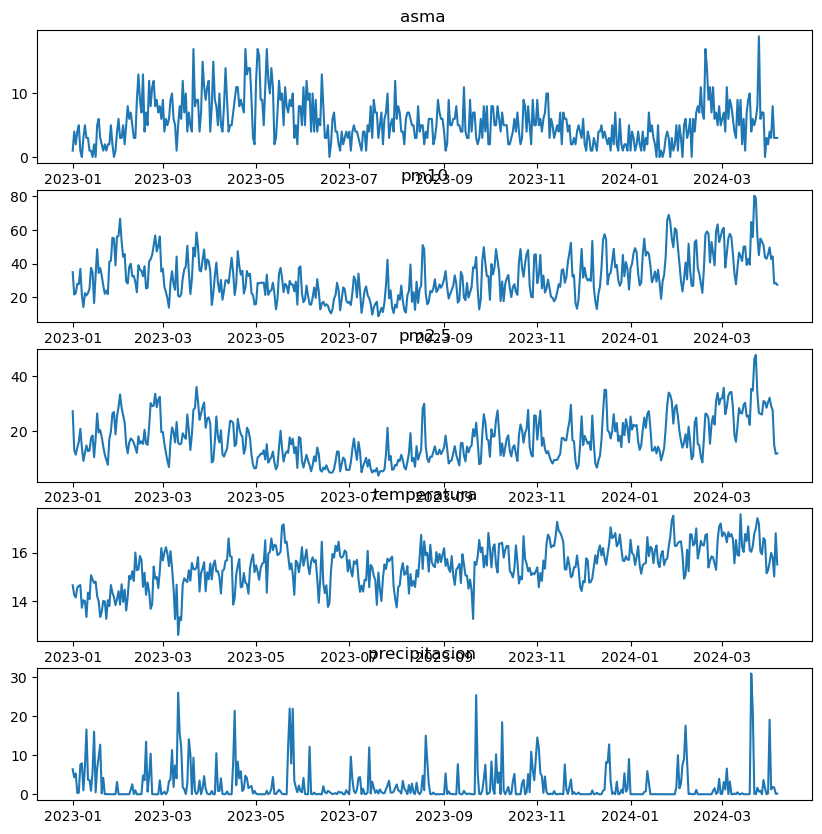

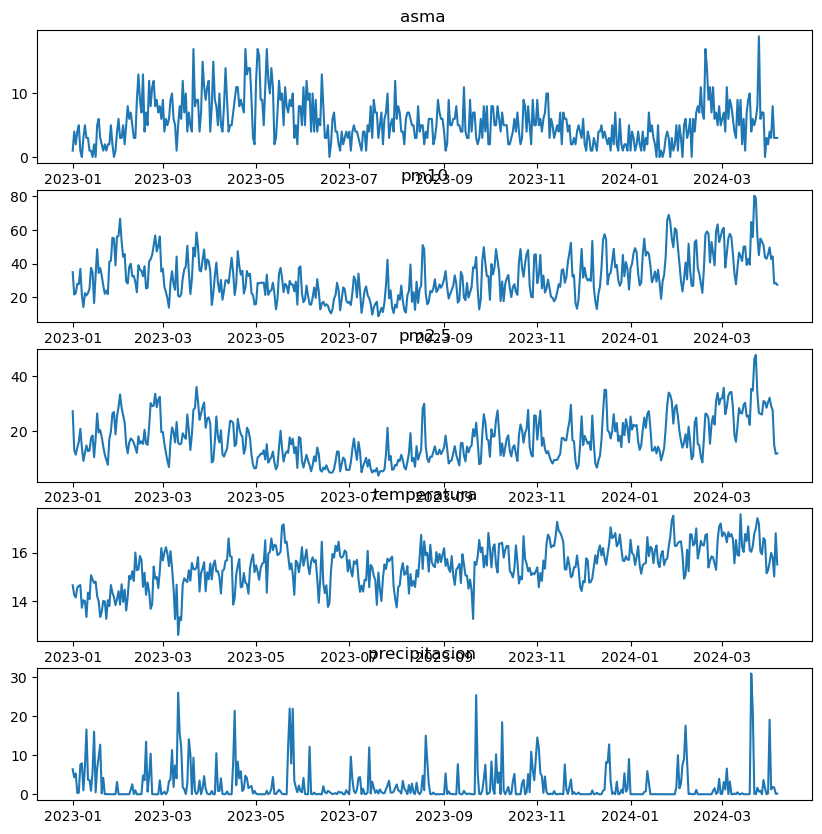

In [13]:
# Verificar la estabilidad del modelo
model_fitted.plot()


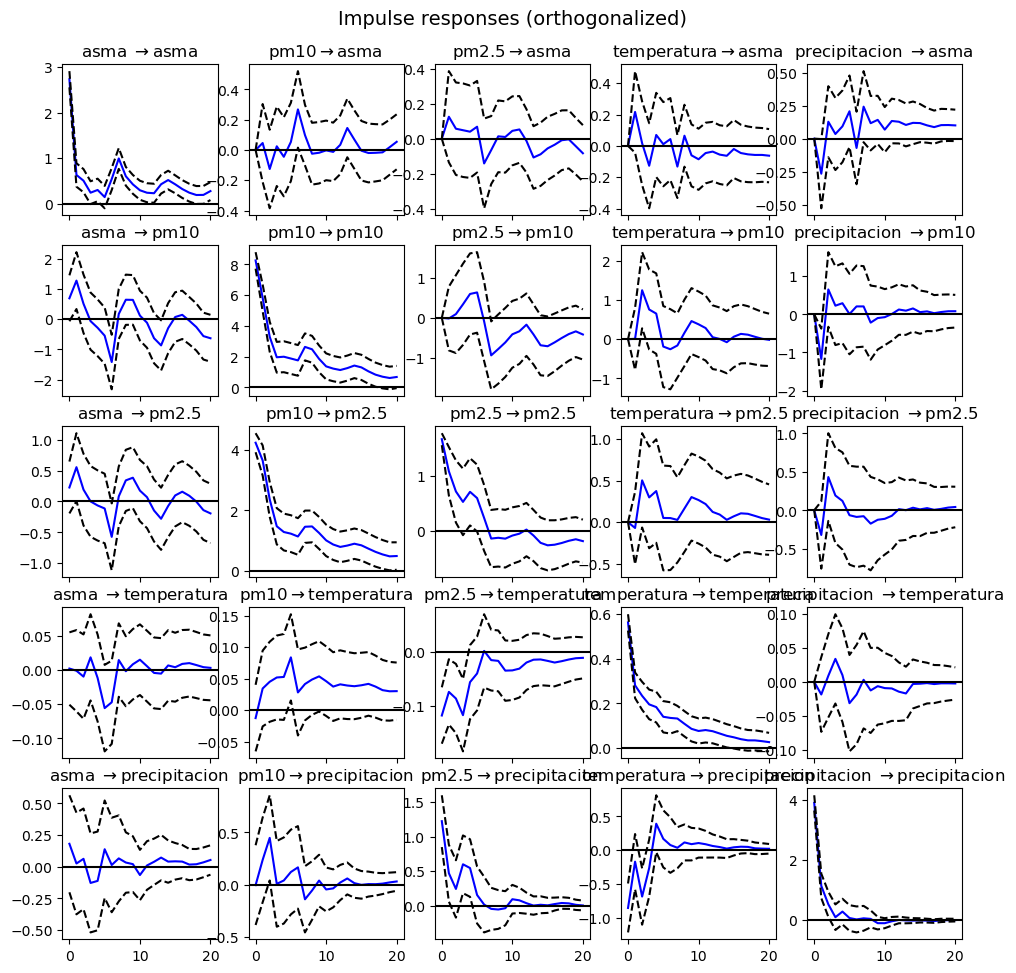

In [16]:

# Funciones de Impulso-Respuesta
irf = model_fitted.irf(20)
irf.plot(orth=True)
plt.show()


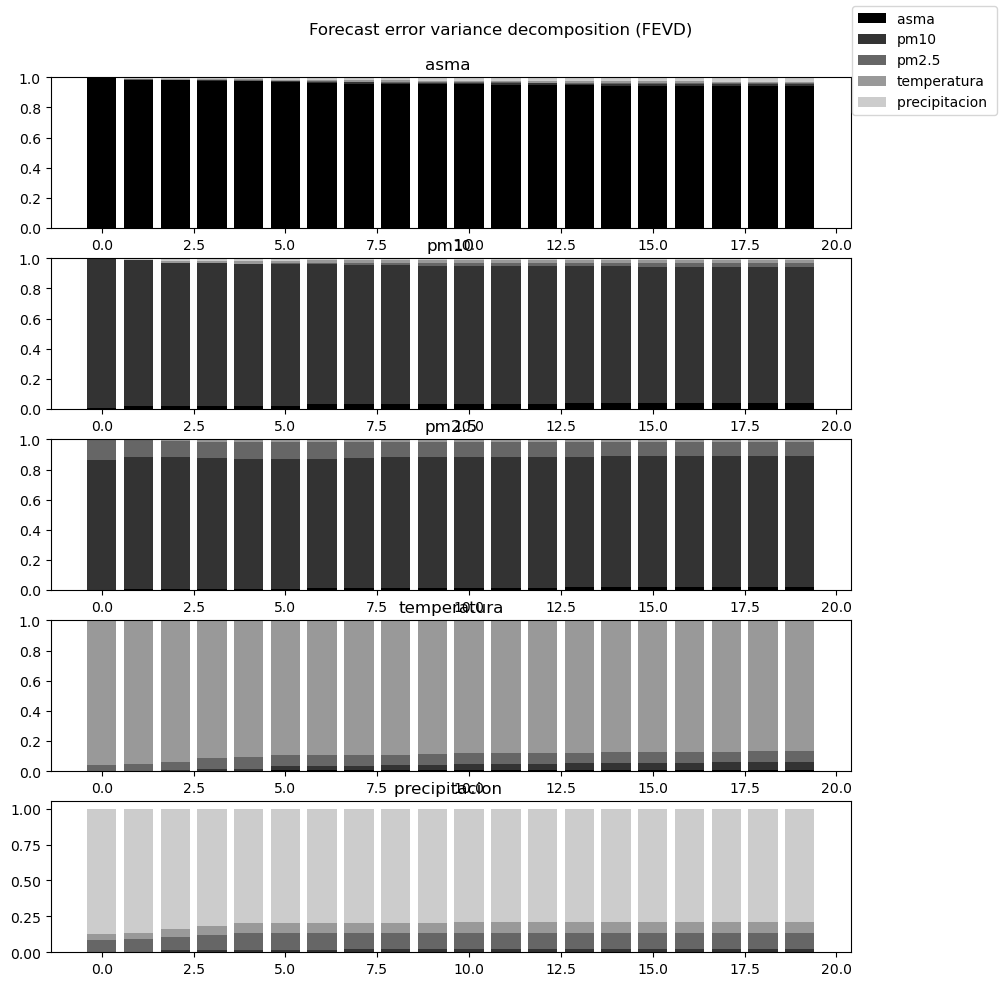

In [15]:

# Descomposición de la varianza
fevd = model_fitted.fevd(20)
fevd.plot()
plt.show()
